# Задание

**Цель:** изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

**Описание задания:**
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с [сайта](https://www.cs.toronto.edu/~delve/data/adult/desc.html).
Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по [ссылке](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).
Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

**Этапы работы:**
- Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
- Проведите первичный анализ.
- Проверьте данные на пропуски. Удалите в случае обнаружения. Предложите альтернативный способ работы с пропусками
- Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
- Преобразуйте категориальные признаки.
- Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
- Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
- Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.
- Сформулируйте выводы по проделанной работе.
- Кратко опишите какие преобразования были сделаны с данными.
- Сравните точность двух моделей.
- Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. Что по вашему мнению нужно сделать, чтобы улучшить результат?

Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

**Результат:** получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации, сделан вывод о целесообразности их применения к данным.

**Форма выполнения**: ссылка на Jupyter Notebook, загруженный на GitHub; ссылка на Google Colab; файл с расширением .ipynb.
Инструменты: Jupyter Notebook/Google Colab; GitHub.

**Срок выполнения:** 7 календарных дней

**Рекомендации к выполнению:**
Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.
Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

# 1. Предобработка данных.

Импорт библиотек.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Загрузка данных и первичный анализ.

In [2]:
df = pd.read_csv('data\\adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## 2) Проверка данных на пропуски.

Проверим все столбцы с типом данных *object* на наличие пропусков.

In [5]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

В столбце **workclass** имеются пропуски.

In [6]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

В столбце **education** отсутствуют пропуски.

In [7]:
df["marital-status"].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

В столбце **marital-status** отсутствуют пропуски.

In [8]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

В столбце **occupation** имеются пропуски.

In [9]:
df.relationship.value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

В столбце **relationship** отсутствуют пропуски.

In [10]:
df.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

В столбце **race** отсутствуют пропуски.

In [11]:
df.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

В столбце **gender** отсутствуют пропуски.

In [12]:
df["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

В столбце **native-country** имеются пропуски.

In [13]:
df.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

В столбце **income** отсутствуют пропуски.

Мы видим, что. не смотря на отсутствие null значений, в столбцах **workclass**, **occupation** и **native-country** присутствуют пропуски в виде '**?**'. Удалим их.

In [14]:
df = df.loc[~(df.workclass == '?')]
df = df.loc[~(df.occupation == '?')]
df = df.loc[~(df['native-country'] == '?')]

In [15]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


**Альтернативой удалению может быть заполнение пропусков модальным значением.**

## 3) Визуализация.

[Text(0.5, 1.0, 'Распределение уровня дохода по возрасту')]

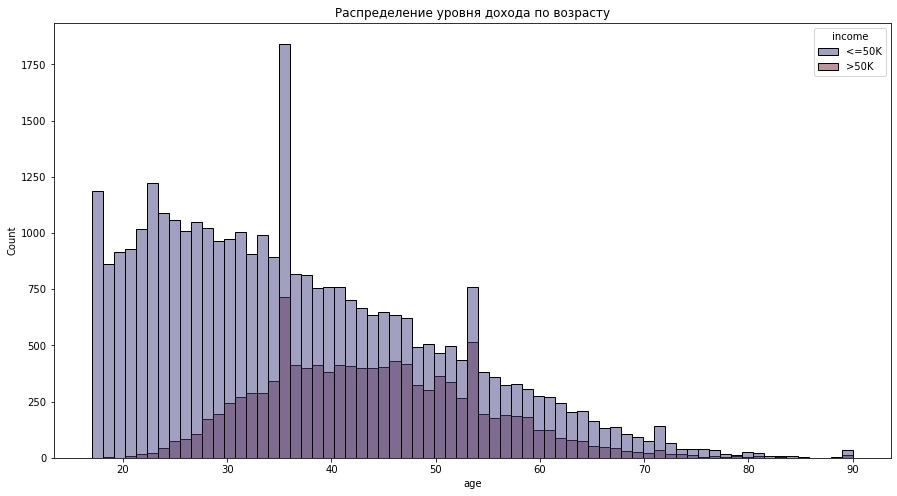

In [16]:
plt.figure(figsize=(15,8))

sns.histplot(data=df, x='age', hue='income', palette='icefire').set(title="Распределение уровня дохода по возрасту")

В данных присутствует нелинейная зависимость числа людей с доходом >50K от возраста.

[Text(0.5, 1.0, 'Распределение уровня дохода по полу')]

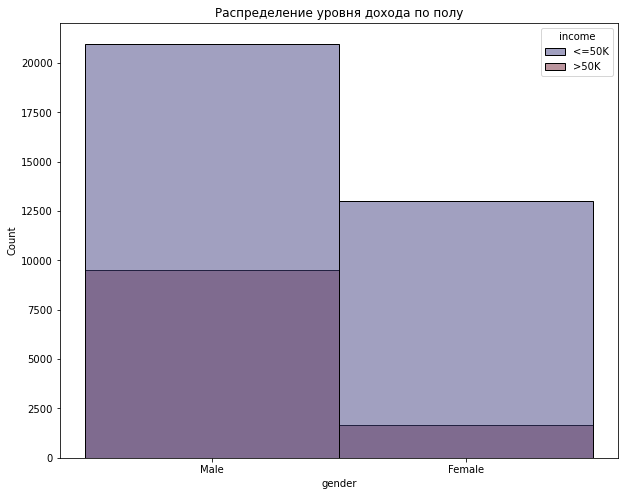

In [17]:
plt.figure(figsize=(10,8))

sns.histplot(data=df, x='gender', hue='income', palette='icefire').set(title="Распределение уровня дохода по полу")

Доля людей с доходом >50K среди женщин значительно ниже, чем среди мужчин.

## 4) Преобразование категориальных признаков.

In [18]:
X = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status',
                                'occupation', 'relationship', 'race',
                                'gender', 'native-country'], drop_first=True)
del X['income']

X.shape

(45222, 96)

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df.income)

LabelEncoder()

In [20]:
y = pd.Series(data=le.transform(df.income))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

## 5) Разделение выборки на обучающее и тестовое подмножество.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Обучение моделей.

## 1) Логистическая регрессия.

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

lreg = make_pipeline(StandardScaler(), LogisticRegression())

In [23]:
lreg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [24]:
lreg.score(X_test, y_test)

0.8509673852957435

## 2) Метод опорных векторов.

In [25]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

svc = make_pipeline(MinMaxScaler(), SVC())

In [26]:
svc.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

In [27]:
svc.score(X_test, y_test)

0.8425649530127142

# 3. Выводы

В рамках данной работы была решена задача бинарной классификации физических лиц по уровню дохода.
Была проведена предобработка данных(поиск и удаление пропусков, визуализация некоторых признаков, преобразование категориальных признаков, нормализация/стандартизация).
По итогам оценки качества моделей можно сделать промежуточный вывод о том, что модель логистической регрессии показывает большую точность на имеющихся данных, чем метод опорных векторов(0,850967 и 0,842565 соответственно).

В целом, модели показали неплохую точность. Для улучшения результата можно подобрать более оптимальные параметры моделей.